## Big Data Mining
### Project 2
### 2019-2020

Kyriakos   Zormpas  
Alexandros Zotos  
Theodora  Koutsothanasi  
Evangelia Santorinaiou  dsc19024  

## Libraries

In [23]:
#!pip install namegenerator

In [77]:
import pandas as pd
import numpy as np

import namegenerator
from datetime import datetime, timedelta
import random
import time
import names

### Dataset Creation

Our scenario in order to build our dataset is that we have all the restaurants of the world, name, id, when they were founded and their age, their coordinates, their speciality and their reviews. 

In [7]:
def str_time_prop(start, end, format, prop):
    """Get a time at a proportion of a range of two formatted times.

    start and end should be strings specifying times formated in the
    given format (strftime-style), giving an interval [start, end].
    prop specifies how a proportion of the interval to be taken after
    start.  The returned time will be in the specified format.
    """

    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))

    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y', prop)

To find the random latitude amd longitude we used worldcitiespop.csv and we kept the country and the city that match each combination. We did not use AccentCity column because it is the same with City but with accents thus it not provides additional information. Also we removed Population because most of the values were Nan and Region because we will not use it in our scenario.

In [8]:
def get_latitude_longititude():
    df = pd.read_csv('worldcitiespop.csv')
    return df.loc[:,['Country', 'City', 'Latitude', 'Longitude']]

In [38]:
df_lat = get_latitude_longititude()[:100]
df_lat.head(5)

,Country,City,Latitude,Longitude
0,ad,aixas,42.483333,1.466667
1,ad,aixirivali,42.466667,1.500000
2,ad,aixirivall,42.466667,1.500000
3,ad,aixirvall,42.466667,1.500000
4,ad,aixovall,42.466667,1.483333


In [36]:
restaurant_df = pd.DataFrame(columns=['id', 'name', 'cid', 'sid', 'rid', 'founded', 'age'])


for i in range(df_lat.shape[0]):
    r_date = random_date("01/01/2008", "12/31/2019", random.random())
    
    restaurant_df.loc[i] = [np.random.randint(100000, 999999), 
                                   namegenerator.gen(), 
                                   np.random.randint(100000, 999999), 
                                   np.random.randint(10000, 99999), 
                                   np.random.randint(100000, 999999),  
                                   r_date, 
                                   int(str(datetime.today())[:4]) - int(r_date[6:])]
restaurant_df.head(5)

,id,name,cid,sid,rid,founded,age
0,633145,paltry-magnolia-devil,984834,88166,856990,02/16/2014,5
1,416767,crappy-crimson-warthog,613363,91439,239438,12/09/2015,4
2,828095,cozy-coral-hedgehog,357854,39290,208271,02/12/2012,7
3,435360,cheeky-mauve-warthog,719916,59764,367319,12/20/2011,8
4,991204,hilly-wisteria-beagle,222263,87596,260027,05/13/2015,4


In [35]:
coordinates = pd.DataFrame(columns = ['id', 'latitude', 'longitude', 'city', 'country'])

coordinates['id'] = restaurant_df['cid']
df_ll = get_latitude_longititude()[:100]
coordinates['latitude'] = df_ll['Latitude']
coordinates['longitude'] = df_ll['Longitude']
coordinates['city'] = df_ll['City']
coordinates['country'] = df_ll['Country']

coordinates.head(5)

/home/eva/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,id,latitude,longitude,city,country
0,888985,42.483333,1.466667,aixas,ad
1,769701,42.466667,1.500000,aixirivali,ad
2,861660,42.466667,1.500000,aixirivall,ad
3,578922,42.466667,1.500000,aixirvall,ad
4,352778,42.466667,1.483333,aixovall,ad


In [14]:
speciality_df = pd.DataFrame(columns = [ 'id', 'name', 'calories', 'price', 'cuisine_name', 'is_vegan', 
                                        'is_gluten_free', 'is_lactose_free'])

specialityNamesList = [line.strip() for line in open("specialityNames.txt", 'r', encoding="utf8")]
cuisineNamesList = [line.strip() for line in open("cuisineNames.txt", 'r', encoding="utf8")]

speciality_df['id'] = restaurant_df['sid']
for i in range(restaurant_df.shape[0]):
    speciality_df.loc[i]['name'] = random.choice(specialityNamesList)
    speciality_df.loc[i]['calories'] = random.randrange(50, 1000)
    speciality_df.loc[i]['price']= random.randrange(1, 3500)
    speciality_df.loc[i]['cuisine_name'] = random.choice(cuisineNamesList)
    speciality_df.loc[i]['is_vegan'] = random.randrange(100) < 25
    speciality_df.loc[i]['is_gluten_free'] = random.randrange(100) < 15
    speciality_df.loc[i] ['is_lactose_free'] = random.randrange(100) < 15


In [34]:
speciality_df.head(5)

,id,name,calories,price,cuisine_name,is_vegan,is_gluten_free,is_lactose_free
0,74325,"Imperial, (very delicate) Sherry",125,2676,Tamil,False,False,False
1,36021,Roast Stuffed Chicken - Apple Sauce,247,2748,Rajasthani,False,False,True
2,55716,Plain Omelet with Rasher of Bacon,598,1713,Greek,True,False,False
3,80131,TOSCANO ROSSO DIANELLA,235,1886,Taiwanese,True,False,False
4,16891,Sliced Hard Boiled Egg Salad,563,2250,Cypriot,False,True,False


In [69]:
reviews_df = pd.DataFrame(columns=['First_Name','Last_Name','Reviews'])

for i in range(100): 
    reviews_df.loc[i] = [names.get_first_name(), names.get_last_name(), np.random.randint(1,5)]

reviews_df['id'] = restaurant_df['rid']
reviews_df.head(5)

,First_Name,Last_Name,Reviews,id
0,Laura,Fairman,3,856990
1,Justin,Sevilla,1,239438
2,Davis,Johnson,4,208271
3,Robert,Ross,4,367319
4,James,Reynolds,3,260027


### Add Noise

One case we thought for noise is that some restaurants either do not have specility dish or their speciality is missing. Thus in restaurant dataframe in column sid we added some null values and also we changed some ids from speciality so that sid from restaurants and id from speciality do not much.

In [43]:
def noise_gen(df, nn, range_, col):
    
    for i in range(nn):
        df.loc[np.random.randint(0, df.shape[0]-1)][col] = np.random.randint(range_[0], range_[1])
    
    return df

In [53]:
noisy_restaurant = noise_gen(restaurant_df, int(restaurant_df.shape[0] * 1/100), (1000, 9000), 'id')
noisy_restaurant

,id,name,cid,sid,rid,founded,age
0,633145,paltry-magnolia-devil,984834,88166,856990,02/16/2014,5
1,416767,crappy-crimson-warthog,613363,91439,239438,12/09/2015,4
2,828095,cozy-coral-hedgehog,357854,39290,208271,02/12/2012,7
3,435360,cheeky-mauve-warthog,719916,59764,367319,12/20/2011,8
4,991204,hilly-wisteria-beagle,222263,87596,260027,05/13/2015,4
5,789328,pasty-khaki-collie,323999,18912,200695,10/10/2018,1
6,340029,jumpy-puce-sloth,852754,54005,291873,11/22/2009,10
7,564208,flimsy-smalt-schnauzer,556985,24184,779961,07/06/2013,6
8,136984,squeaky-cerise-seahorse,796724,94435,258257,02/01/2016,3
9,331793,sloppy-champagne-rhinoceros,656300,84035,758034,10/09/2017,2


In [71]:
noisy_reviews = noise_gen(reviews_df, int(reviews_df.shape[0] * 1/10), (-2, 0), 'Reviews')
noisy_reviews = noise_gen(reviews_df, int(noisy_reviews.shape[0] * 1/10), (6, 10), 'Reviews')
noisy_reviews

,First_Name,Last_Name,Reviews,id
0,Laura,Fairman,3,856990
1,Justin,Sevilla,1,239438
2,Davis,Johnson,4,208271
3,Robert,Ross,-2,367319
4,James,Reynolds,3,260027
5,Clarence,Mahurin,2,200695
6,Margaret,Dunnings,1,291873
7,Concepcion,Brightharp,2,779961
8,Kelly,Peavler,7,258257
9,Nancy,Waymire,2,758034


In [78]:
def add_missing_values(df, number, col=None):
    for i in range(number):
        pos = np.random.randint(0, len(df))
        df.loc[pos, col] = None

## Data Cleaning

In [89]:
restaurant_df

,id,name,cid,sid,rid,founded,age
0,633145,paltry-magnolia-devil,984834,88166,856990,02/16/2014,5
1,416767,crappy-crimson-warthog,613363,91439,239438,12/09/2015,4
2,828095,cozy-coral-hedgehog,357854,39290,208271,02/12/2012,7
3,435360,cheeky-mauve-warthog,719916,59764,367319,12/20/2011,8
4,991204,hilly-wisteria-beagle,222263,87596,260027,05/13/2015,4
5,789328,pasty-khaki-collie,323999,18912,200695,10/10/2018,1
6,340029,jumpy-puce-sloth,852754,54005,291873,11/22/2009,10
7,564208,flimsy-smalt-schnauzer,556985,24184,779961,07/06/2013,6
8,136984,squeaky-cerise-seahorse,796724,94435,258257,02/01/2016,3
9,331793,sloppy-champagne-rhinoceros,656300,84035,758034,10/09/2017,2


In [94]:
now = datetime.now()
current_year = now.year

for i,d in restaurant_df.iterrows():
    founded_year = d['founded']
    age = d['age']
    founded_year = founded_year.split('/')[2]
    real_age = current_year - int(founded_year)
    if real_age != age:
        print(d['id'], " : ", age, " changed to ", real_age)
        df.at[i,'Age'] = real_age       
        

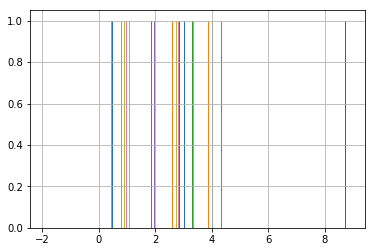

In [113]:
reviews_df['Reviews'].hist()

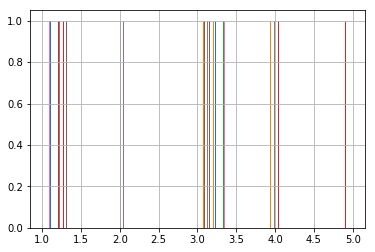

In [114]:
reviews_df['Reviews_c'].hist()

In [95]:
reviews_df['Reviews_c'] = np.where(noisy_reviews['Reviews']<1, 1, noisy_reviews['Reviews'])
##Check that correctness apllied
review_values=reviews_df['Reviews_c'].value_counts()
print(review_values)
reviews_df['Reviews_c'] = np.where(noisy_reviews['Reviews_c']>5, 5, noisy_reviews['Reviews_c'])
review_values=reviews_df['Reviews_c'].value_counts()
print(review_values)

1    32
3    28
2    22
4    10
6     3
9     2
7     2
8     1
Name: Reviews_c, dtype: int64
1    32
3    28
2    22
4    10
5     8
Name: Reviews_c, dtype: int64


In [115]:
reviews_df.head()

,First_Name,Last_Name,Reviews,id,Reviews_c
0,Laura,Fairman,3,856990,3
1,Justin,Sevilla,1,239438,1
2,Davis,Johnson,4,208271,4
3,Robert,Ross,-2,367319,1
4,James,Reynolds,3,260027,3
